Md. Tanvir Jawad <br>ID: 21101221

In [1]:
try:
    import pint
except ImportError:
    !pip install pint

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.0/294.0 kB 5.6 MB/s eta 0:00:00


In [2]:
from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)

download('https://raw.githubusercontent.com/AllenDowney/' +
         'ModSimPy/master/modsim.py')

Downloaded modsim.py


In [3]:
from modsim import *

In [4]:
download('https://raw.githubusercontent.com/AllenDowney/' +
         'ModSimPy/master/chap03.py')

Downloaded chap03.py


In [5]:
from chap03 import step

In [6]:
from numpy import sqrt

root_2 = sqrt(2)
root_2

1.4142135623730951

In [7]:
def add_five(x):
    return x + 5

In [9]:
def run_simulation(p1, p2, num_steps):
    state = State(olin=10, wellesley=2, olin_empty=0, wellesley_empty=0)

    for i in range(num_steps):
        step(state, p1, p2)

    return state

In [11]:
final_state = run_simulation(0.3, 0.2, 60)
print(final_state.olin_empty,final_state.wellesley_empty)

1 0


In [12]:
from numpy import linspace

p1_array = linspace(0, 1, 5)
p1_array

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [13]:
for p1 in p1_array:
    print(p1)

0.0
0.25
0.5
0.75
1.0


In [14]:
p1_array = linspace(0, 0.6, 6)
p2 = 0.2
num_steps = 60

for p1 in p1_array:
    final_state = run_simulation(p1, p2, num_steps)
    print(p1, final_state.olin_empty)

0.0 0
0.12 0
0.24 0
0.36 0
0.48 0
0.6 16


In [15]:
sweep = SweepSeries()

In [17]:
p1_array = linspace(0, 0.6, 31)

for p1 in p1_array:
    final_state = run_simulation(p1, p2, num_steps)
    sweep[p1] = final_state.olin_empty
show(sweep)

,Metric
Parameter,
0.00,0
0.02,0
0.04,0
0.06,0
0.08,0
0.10,0
0.12,0
0.14,0
0.16,0


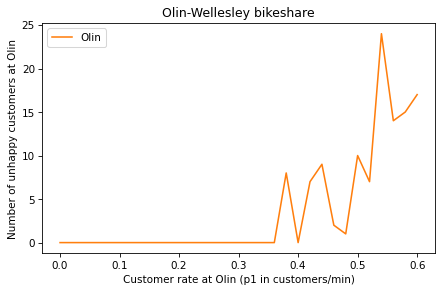

In [18]:
sweep.plot(label='Olin', color='C1')

decorate(title='Olin-Wellesley bikeshare',
         xlabel='Customer rate at Olin (p1 in customers/min)',
         ylabel='Number of unhappy customers at Olin')

In [19]:
def make_state():
    state = State(olin=10, wellesley=2)
    return state

In [20]:
init = make_state()
show(init)

,state
olin,10
wellesley,2


In [21]:
p1_array = linspace(0, 1, 101)

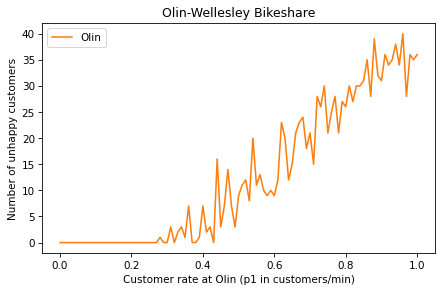

In [23]:
def sweep_p1(p1_array):
    p2 = 0.2
    num_steps = 60
    sweep = SweepSeries()

    for p1 in p1_array:
        state = run_simulation(p1, p2, num_steps)
        sweep[p1] = state.olin_empty

    return sweep
p1_array = linspace(0, 1, 101)
sweep2 = sweep_p1(p1_array)
sweep2.plot(label='Olin', color='C1')
decorate(title='Olin-Wellesley Bikeshare',
         xlabel='Customer rate at Olin (p1 in customers/min)',
         ylabel='Number of unhappy customers')

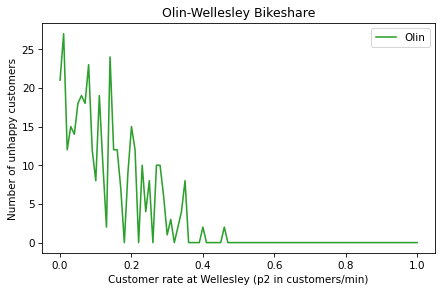

In [24]:
def sweep_p2(p2_array):
    p1 = 0.5
    num_steps = 60
    sweep = SweepSeries()

    for p2 in p2_array:
        state = run_simulation(p1, p2, num_steps)
        sweep[p2] = state.olin_empty

    return sweep
p2_array = linspace(0, 1, 101)
sweep3 = sweep_p2(p2_array)
sweep3.plot(label='Olin', color='C2')

decorate(title='Olin-Wellesley Bikeshare',
         xlabel='Customer rate at Wellesley (p2 in customers/min)',
         ylabel='Number of unhappy customers')

In [25]:
def run_multiple_simulations(p1, p2, num_steps, num_runs):
    totals = TimeSeries()

    for i in range(num_runs):
        state = run_simulation(p1, p2, num_steps)
        totals[i] = state.olin_empty + state.wellesley_empty

    return totals
p1 = 0.3
p2 = 0.3
num_steps = 60
num_runs = 10
totals = run_multiple_simulations(p1, p2, num_steps, num_runs)
show(totals)

,Quantity
Time,
0,1
1,2
2,0
3,2
4,0
5,3
6,0
7,11
8,1


In [26]:
from numpy import mean

mean(totals)

2.0

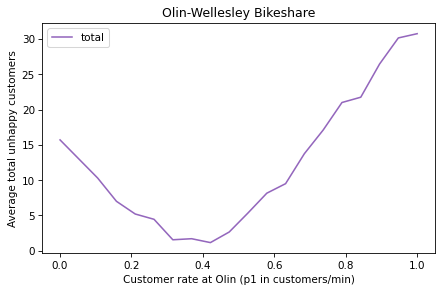

In [28]:
p1_array = linspace(0, 1, 20)
p2 = 0.3
num_steps = 60
num_runs = 20

sweep4 = SweepSeries()
for p1 in p1_array:
    totals = run_multiple_simulations(p1, p2, num_steps, num_runs)
    sweep4[p1] = mean(totals)
sweep4.plot(label='total', color='C4')

decorate(title='Olin-Wellesley Bikeshare',
         xlabel='Customer rate at Olin (p1 in customers/min)',
         ylabel='Average total unhappy customers')